Import the boston dataset from scikit-learn library and perform a linear regression based on the "RM" (average number of rooms per dwelling) to predict the "MEDV"(Median value of owner-occupied homes in $1000's). 

In [8]:
from sklearn.datasets import load_boston
%matplotlib inline 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import seaborn as sns
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [9]:
X, y = boston.data, boston.target
X=X[:, [5]]

In [10]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           2.49e-74
Time:                        21:37:51   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
x1             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualize the relationship between the variables.

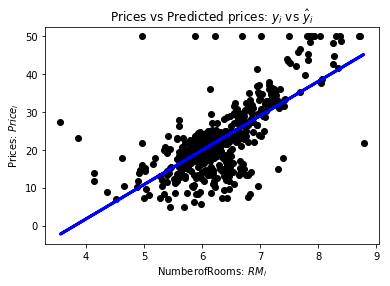

In [11]:
plt.xlabel("NumberofRooms: $RM_i$")
plt.ylabel("Prices: $Price_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")
plt.scatter(X[:,[1]],y,  color='black')
plt.plot(X[:,[1]],predictions, color='blue', linewidth=3)
plt.show()

Perfrom linear regression, draw the learning and validation curves and give your interpretations of the same. (Please refer the book for plotting and interpreting the learning and validation curves)

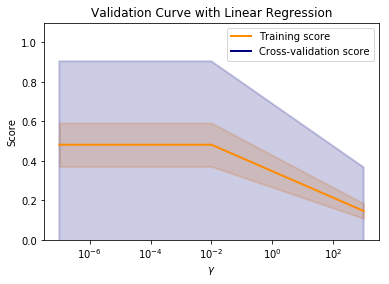

In [12]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
train_scores, valid_scores = validation_curve(Ridge(), X, y, "alpha",np.logspace(-7, 3, 3),cv=5)
param_range=np.logspace(-7, 3, 3)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with Linear Regression")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

The purpose of validation curve is to validate a model using a scoring function and altering the hyper parameters to optimize the scoring function value. Here I am using my regularized linear model to validate a scoring function by altering parameters and the model has pretty poor generalizing capability as the hyper-parameter tuning made the model to over-fit the data and we are not able to generalize better

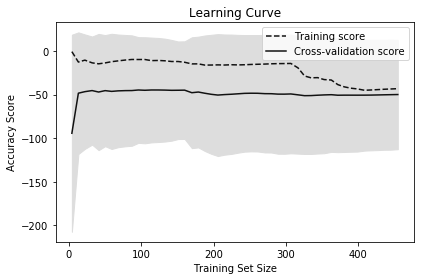

In [13]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
boston = load_boston()
Z, r = boston.data[:, [5]], boston.target
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), 
                                                        Z, 
                                                        r,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='neg_mean_squared_error',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

The learning curves are plotted to examine the bias-variance trade-off and in the plot we can see that both curves do not converge even after we train it with 300 instances out of 506 and so we can see a biased model here where adding more data to train the model can decrease the bias and increase the generalizable capability of the model

Compare the coefficients from the closed form equation, sklearn and stochastic gradient descent. 

In [14]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_best

array([-34.67062078,   9.10210898])

In [15]:
n_epochs=50
t0,t1=5,50
def learning_schedule(t):
    return t0/(t+t1)

In [16]:
iter = 100
m = 100
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(iter):
        rand_index=np.random.randint(m)
        Xi=X[rand_index:rand_index+1]
        yi=y[rand_index:rand_index+1]
        grads = 2*Xi.T.dot(Xi.dot(theta)-yi)
        lrate=learning_schedule(epoch*m+i)
        theta = theta - lrate*grads
theta

array([[-7.41069208e+49],
       [ 1.14235098e+49]])

In [17]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
lin_reg=LinearRegression()

In [18]:
X, y = boston.data, boston.target
X=X[:, [5]]

In [19]:
lin_reg.fit(X,y,sample_weight=None)
lin_reg.intercept_, lin_reg.coef_

(-34.67062077643857, array([9.10210898]))

In [22]:
lin_reg.score(X,y)

0.4835254559913343

Above I had implemented the code in Sklearn, Closed-form equation and Stochastic Gradient Descent and we can see that the coefficients obtained from closed form equation and sklearn are same as we obtained from OLS Regression but in Stochastic Gradient Descent we can see that the co-efficients are pretty random for each run because of the oscillation of the cost function. As we know in SGD we are optimizing the cost function(mean squared error in this case) with a single instance of our training set even after multiple tweaking of the parameters like epochs and iterations I am not able to acheive the best co-efficient values.  

Plot your predcitions on a graph

In [25]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           2.49e-74
Time:                        22:26:24   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
x1             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

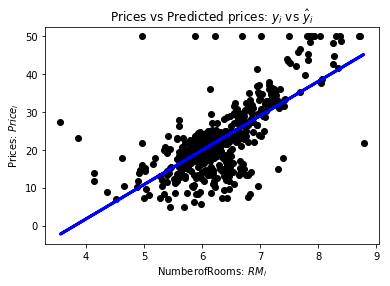

In [26]:
plt.xlabel("NumberofRooms: $RM_i$")
plt.ylabel("Prices: $Price_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")
plt.scatter(X[:,[1]],y,  color='black')
plt.plot(X[:,[1]],predictions, color='blue', linewidth=3)
plt.show()